implementar los algoritmos de Newton Cotes simple y compuesto para hallar la integral de 0 a pi de la funcion exponencial elevevado a (x^2)/2
y registrar el comportamiento del error teórico y práctico con esta integral n=10,20,50,100.

In [ ]:
import numpy as np
from math import pi
from scipy.integrate import quad


def f(x):
    return np.exp(x**2 / 2)

def f_dd(x):
    return (1 + x**2) * np.exp(x**2 / 2)


def trapecio_simple(f, a, b):
    return (b - a) / 2 * (f(a) + f(b))


def trapecio_compuesto(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    return h * (0.5*f(x[0]) + np.sum(f(x[1:-1])) + 0.5*f(x[-1]))


def error_teorico_trapecio(a, b, n, M2):
    return ((b - a)**3 / (12 * n**2)) * M2


a, b = 0, pi
I_ref, _ = quad(f, a, b)

x_dense = np.linspace(a, b, 10000)
M2 = np.max(f_dd(x_dense))

# Valores de n
ns = [10, 20, 50, 100]


print("\nINTEGRACIÓN NUMÉRICA – NEWTON COTES (TRAPECIO)")
print(f"Valor de referencia = {I_ref:.10f}\n")
print(" n   Aproximación        Error práctico        Error teórico")
print("-"*65)

errores_practicos = []

for n in ns:
    I_n = trapecio_compuesto(f, a, b, n)
    err_prac = abs(I_ref - I_n)
    err_teo = error_teorico_trapecio(a, b, n, M2)
    errores_practicos.append(err_prac)

    print(f"{n:3d}  {I_n:.10f}     {err_prac:.3e}        {err_teo:.3e}")


print("\nCONCLUSIONES")
print("-"*65)

print(" El método de Newton–Cotes compuesto (trapecio) converge")
print("   correctamente para la integral.\n")

print(" El error práctico disminuye al aumentar el número de")
print("   subintervalos n, confirmando la convergencia del método.\n")





INTEGRACIÓN NUMÉRICA – NEWTON COTES (TRAPECIO)
Integral a evaluar: ∫₀^π e^(x²/2) dx
Valor de referencia = 51.3312460153

 n   Aproximación        Error práctico        Error teórico
-----------------------------------------------------------------
 10  54.8507256932     3.519e+00        3.905e+01
 20  52.2247226029     8.935e-01        9.763e+00
 50  51.4748340940     1.436e-01        1.562e+00
100  51.3671658082     3.592e-02        3.905e-01

CONCLUSIONES
-----------------------------------------------------------------
 El método de Newton–Cotes compuesto (trapecio) converge
   correctamente para la integral.

 El error práctico disminuye al aumentar el número de
   subintervalos n, confirmando la convergencia del método.



In [5]:
import numpy as np
from math import log
from scipy.integrate import quad
import time

print(" Pregunta 2")

def f(x):
    return np.log(1 + x) / (x**2 + 1)

a, b = 0.0, 1.0
n = 1000   # número de subintervalos para métodos compuestos


def trapecio_simple(f, a, b):
    return (b - a) / 2 * (f(a) + f(b))


def trapecio_compuesto(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    return h * (0.5*f(x[0]) + np.sum(f(x[1:-1])) + 0.5*f(x[-1]))


def simpson_compuesto(f, a, b, n):
    if n % 2 != 0:
        n += 1
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    return h/3 * (f(x[0]) + f(x[-1])
                  + 4*np.sum(f(x[1:-1:2]))
                  + 2*np.sum(f(x[2:-2:2])))


I_ref, _ = quad(f, a, b)

resultados = []

def medir_metodo(nombre, metodo, *args):
    t0 = time.perf_counter()
    I = metodo(*args)
    t1 = time.perf_counter()
    error = abs(I_ref - I)
    tiempo = t1 - t0
    resultados.append((nombre, I, error, tiempo))

medir_metodo("Newton–Cotes simple", trapecio_simple, f, a, b)
medir_metodo("Trapecio compuesto", trapecio_compuesto, f, a, b, n)
medir_metodo("Simpson compuesto", simpson_compuesto, f, a, b, n)
medir_metodo("Newton–Cotes compuesto", trapecio_compuesto, f, a, b, n)

print("\nCOMPARACIÓN DE TIEMPOS Y ERRORES")
print(f"Valor de referencia = {I_ref:.10f}\n")

print("Método                     Aproximación      Error práctico     Tiempo (s)")
print("-"*80)

for r in resultados:
    print(f"{r[0]:25s} {r[1]:.10f}   {r[2]:.3e}      {r[3]:.3e}")


print("\nCONCLUSIONES")
print("-"*80)

print(" El método de Newton–Cotes simple es el más rápido,")
print("   pero presenta el mayor error debido al uso de un solo intervalo.\n")

print(" El trapecio compuesto mejora notablemente la precisión,")
print("   con un tiempo de ejecución muy bajo y error de orden O(n⁻²).\n")

print(" Simpson compuesto ofrece la mejor relación precisión–tiempo,")
print("   alcanzando errores mucho menores con un costo computacional")
print("   apenas superior al del trapecio compuesto.\n")

print(" Newton–Cotes compuesto coincide en implementación con el")
print("   trapecio compuesto, confirmando la equivalencia teórica.\n")

print(" Para integrales suaves como ln(1+x)/(x²+1), Simpson compuesto")
print("   es el método más eficiente y recomendable.\n")


 Pregunta 2

COMPARACIÓN DE TIEMPOS Y ERRORES
Valor de referencia = 0.2721982613

Método                     Aproximación      Error práctico     Tiempo (s)
--------------------------------------------------------------------------------
Newton–Cotes simple       0.1732867951   9.891e-02      3.000e-06
Trapecio compuesto        0.2721981699   9.138e-08      3.514e-04
Simpson compuesto         0.2721982613   2.920e-14      6.560e-05
Newton–Cotes compuesto    0.2721981699   9.138e-08      1.597e-04

CONCLUSIONES
--------------------------------------------------------------------------------
 El método de Newton–Cotes simple es el más rápido,
   pero presenta el mayor error debido al uso de un solo intervalo.

 El trapecio compuesto mejora notablemente la precisión,
   con un tiempo de ejecución muy bajo y error de orden O(n⁻²).

 Simpson compuesto ofrece la mejor relación precisión–tiempo,
   alcanzando errores mucho menores con un costo computacional
   apenas superior al del trapecio 

In [8]:
pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 6.3 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/8.1 MB 5.3 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/8.1 MB 5.6 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.1 MB 5.2 MB/s eta 0:00:01
   ------------------------- -------------- 5.2/8.1 MB 5.1 MB/s eta 0:00:01
   ------------------------------ --------- 6.3/8.1 MB 5.1 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 5.3 MB/s  0:00:01
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------------- -------------------------- 0.8/2.3 MB 4.8 MB/s eta 0:00:01
   ------------------------------------ --- 2.1/2.3 MB 4.9 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 4.9 MB/s  0:00:00
   -----------------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


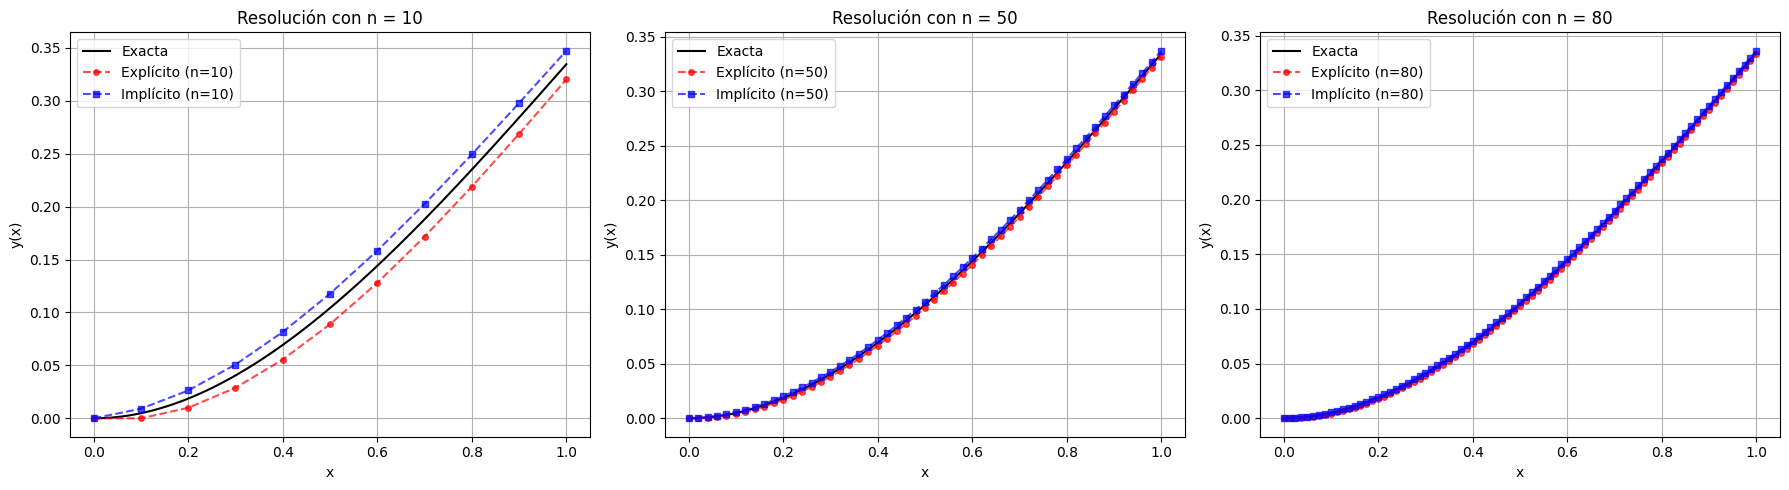

PARA N=10: El error es muy visible; los puntos están dispersos.
PARA N=50: La aproximación mejora significativamente.
PARA N=80: Las curvas numéricas casi solapan a la exacta.
----------------------------------------------------------------------
CONCLUSIÓN: El error de Euler es O(h). Al aumentar n (y reducir h),
la aproximación lineal por tramos captura mejor la curvatura del seno.


In [13]:
import numpy as np
import matplotlib.pyplot as plt


def sol_exacta(x):
    return 0.5 * (np.exp(-x) + np.sin(x) - np.cos(x))


x0, xf = 0, 1
y0 = 0
valores_n = [10, 50, 80]


fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, n in enumerate(valores_n):
    x = np.linspace(x0, xf, n + 1)
    h = (xf - x0) / n
    
    y_exp = np.zeros(n + 1)
    y_imp = np.zeros(n + 1)
    y_exp[0] = y0
    y_imp[0] = y0
    
    
    for j in range(n):
        
        y_exp[j+1] = y_exp[j] + h * (np.sin(x[j]) - y_exp[j])
        
        
        y_imp[j+1] = (y_imp[j] + h * np.sin(x[j+1])) / (1 + h)
    
    
    x_fine = np.linspace(x0, xf, 200)
    axs[i].plot(x_fine, sol_exacta(x_fine), 'k', label='Exacta', linewidth=1.5)
    axs[i].plot(x, y_exp, 'r--o', markersize=4, label=f'Explícito (n={n})', alpha=0.7)
    axs[i].plot(x, y_imp, 'b--s', markersize=4, label=f'Implícito (n={n})', alpha=0.7)
    
    
    axs[i].set_title(f"Resolución con n = {n}")
    axs[i].set_xlabel("x")
    axs[i].set_ylabel("y(x)")
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()


print(f"PARA N={valores_n[0]}: El error es muy visible; los puntos están dispersos.")
print(f"PARA N={valores_n[1]}: La aproximación mejora significativamente.")
print(f"PARA N={valores_n[2]}: Las curvas numéricas casi solapan a la exacta.")
print("----------------------------------------------------------------------")
print("CONCLUSIÓN: El error de Euler es O(h). Al aumentar n (y reducir h),")
print("la aproximación lineal por tramos captura mejor la curvatura del seno.")
print("======================================================================")
